# Analisis Exploratorio de Datos

---
Alumno: Angel Alonso Galarza Chavez <br>
Materia: Mineria de Datos <br>
Docente: Dra. Xiaoou Li

---

In [141]:
# Bibliotecas para el manejo de los datos y la graficacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para el preprocesamiento de los datos
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

## Analisis Exploratorio de Datos

### Cargando el Dataset

In [79]:
# Lista con los nombres de las caracteristicas
adults_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

adults_name

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'target']

In [80]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_income = pd.read_csv('adult/adult.data', names=adults_name, header=None)
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_income_test = pd.read_csv('adult/adult.test', names=adults_name, header=None)
df_income_test['target'] = df_income_test['target'].replace([' <=50K.', ' >50K.'], [' <=50K', ' >50K'])
df_income_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
df_income = pd.concat([df_income_train, df_income_test], axis = 0)
df_income.reset_index(drop=True, inplace=True)
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### Convirtiendo los valores del atributo Target a 0 y 1

In [133]:
# Utilizando la funcion Label Encoder
label_encoder = LabelEncoder()

# Transformando el atributo Target
df_income['target'] = label_encoder.fit_transform(df_income['target'])
df_income.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,target,o__ Armed-Forces,...,r__ Own-child,r__ Unmarried,r__ Wife,w__ Local-gov,w__ Never-worked,w__ Private,w__ Self-emp-inc,w__ Self-emp-not-inc,w__ State-gov,w__ Without-pay
0,39,13,1,1,1,0,40,1,0,False,...,False,False,False,False,False,False,False,False,True,False
1,50,13,0,1,0,0,13,1,0,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,1,1,0,0,40,1,0,False,...,False,False,False,False,False,True,False,False,False,False
3,53,7,0,1,0,0,40,1,0,False,...,False,False,False,False,False,True,False,False,False,False
4,28,13,0,0,0,0,40,0,0,False,...,False,False,True,False,False,True,False,False,False,False


In [134]:
# Valores que contiene cada atributo
for feature in adults_name:
    print('feature values: ', feature, df_income[feature].unique())

feature values:  age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 27 67 33 17 55 61 64 68 66 51 58 26
 60 65 62 63 69]


KeyError: 'workclass'

In [83]:
# Contando los valores nulos en el conjunto de datos
for columna in adults_name:
    conteo = df_income[columna].replace(['?', ' ', ' ?'], np.nan).isnull().sum()
    if conteo > 0:
        porcentaje = (conteo /  df_income['age'].shape[0]) * 100 
        print(f"Cantidad de valores nulos en la columna {columna}: {conteo} = {porcentaje.round(2)}%")

Cantidad de valores nulos en la columna workclass: 1836 = 5.64%
Cantidad de valores nulos en la columna occupation: 1843 = 5.66%
Cantidad de valores nulos en la columna native-country: 583 = 1.79%


### Histograma de los atributos

In [84]:
cols = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex', 'native-country']
col_num_att = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

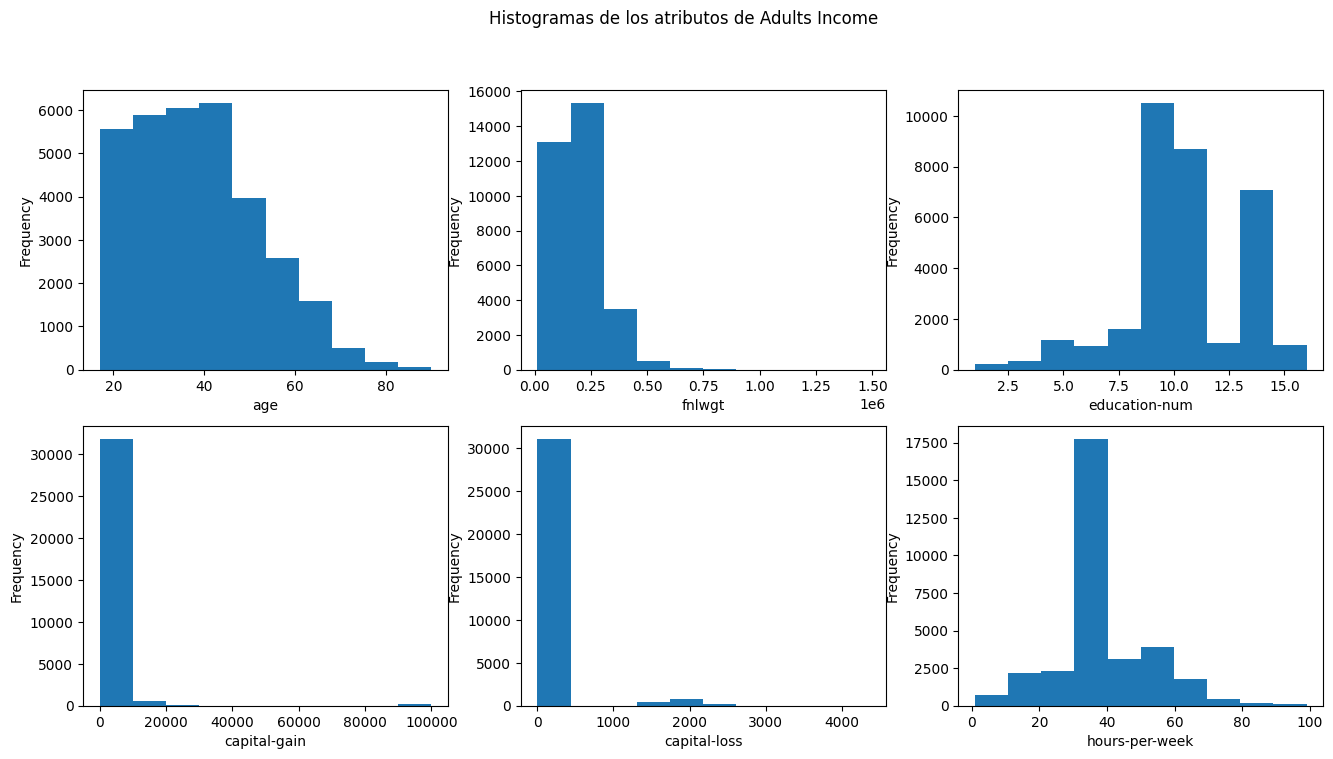

In [85]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

def create_histogram(ax, data, column_name, x_label, y_label):
    ax.hist(data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Loop through each subplot and create a histogram
for i, name in enumerate(col_num_att):
    row = int(i / 3)
    col = i % 3
    create_histogram(axs[row, col], df_income[name], name, name, 'Frequency')

#fig.tight_layout()
fig.suptitle('Histogramas de los atributos de Adults Income')
plt.show()
#fig.savefig("./Imagenes/adult-hist.eps", transparent=True, bbox_inches = 'tight') 

El atributo 'age' tiene una distribucion normal con un sesgo a la izquierda, se puede identificar que existen mas registros con personas de la edad entre los 20 a 50 o 60 años, mientras que personas mayores a 60 años no tienen tantos registros.

Continuando con 'fnlwgt', de igual manera tiene una distribucion normal sesgada a la izquierda con el valor 0.25 que tiene la mayor frecuencia.

El atributo 'education-num', la frecuencia mas alta es con el valor de 10.0, seguida del valor 13.0 y 14.0, mientras que para los valores 2.5 a 1.5 y 15.0, tienen una frecuencia muy baja.

Los atributos 'capital gain' y 'capital loss' son muy parecidos, ambos tienen la frecuencia mas alta con el valor de 0, mientras que para los demas valores de estos atributos no superan las 5,000 registros.

Por ultimo el atributo 'hours-per-week' la mayoria de las frecuencias estan en el valor 40, mientras que los demas valores tienen frecuencias bajas.

<Axes: xlabel='age'>

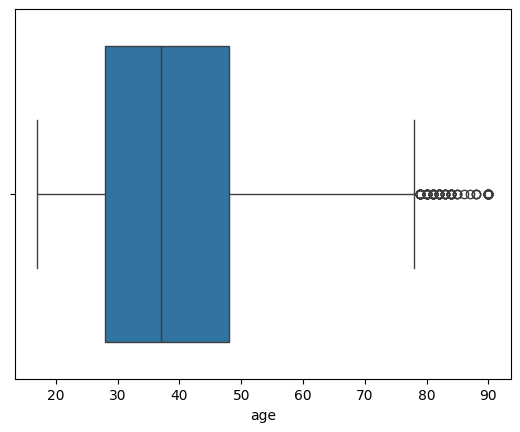

In [86]:
sns.boxplot(x='age', data=df_income)

Existen outliear a partir de los 80 años, por lo que tomara la decision de eliminar esos registros para reducir el conjunto de datos

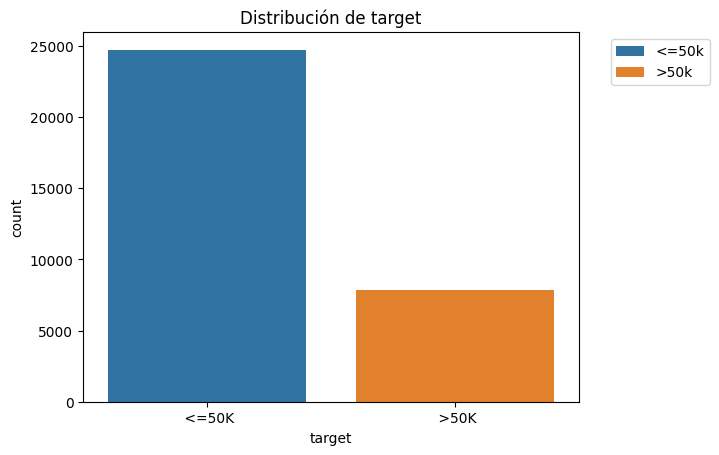

In [87]:
# Graficando el atributo target
sns.countplot(x='target', data=df_income, hue='target')
plt.title(f'Distribución de target')
plt.legend(['<=50k', '>50k'], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#one hot encoding
# o binaria
plt.show()

Existen un desbalance en el atributo 'target' lo que podria dificultar la clasificacion para el modelo de prediccion, especialmente cuando se trata de predecir la clase minoritaria.

### Correlacion de los atributos numericos

In [88]:
# Calcular la matriz de correlación
#correlation_matrix = df_income.corr(col_num_att)
numeric_cols = df_income.select_dtypes(include=['number'])
numeric_cols.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


El atributo 'fnlwgt' tiene una correlacion de -0.009463 con respecto al atributo 'target' por lo que no representa una atributo que aporte una informacion util para el proceso del aprendizaje de los modelos.

Un atributo con una correlación tan baja como 'fnlwgt' puede introducir ruido en el modelo de aprendizaje reduciendo la precisión de las predicciones.
Se tomara la decicsion de eliminar el atributo 'fnlwgt' porque contiene una correlacion practimaente nula con el atributo 'target' y ademas tiene correlacion baja tambien con los demas atributos.

Los atributos 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', si bien no tienen una alta correlacion con respecto al atributo 'target', pueden aportar informacion que sea de ayuda para el modelo de aprendizaje.

### Grafico de barras de los atributos categoricos

#### Atributo Workclass

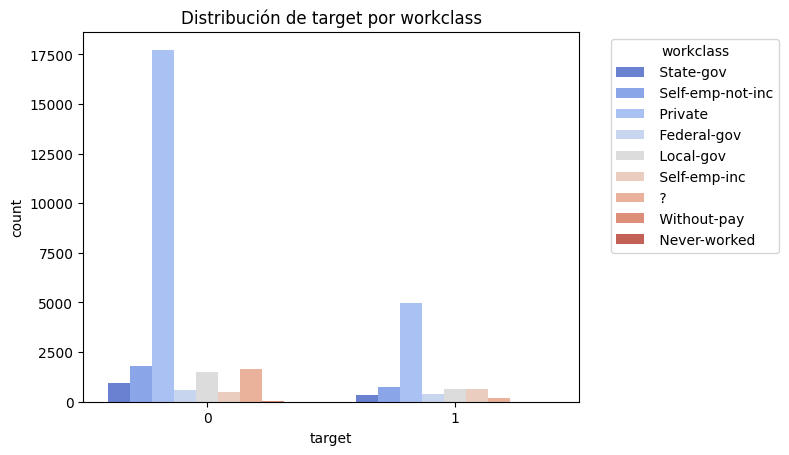

In [12]:
sns.countplot(x='target', hue=cols[0], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[0]}')
plt.legend(title=cols[0], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#one hot encoding
# o binaria
plt.show()

El atributo 'workclass' con el valor 'Private' tiene la mayor frecuencia en ambas clases del atributo 'target', mientras que por el otro lado, los demas valores categoricos tienen la misma frecuencia en ambas clases, siendo algo menores en la clase de '>50k' esto porque esa clase no contiene tantos registros en comparacion con la clase '<=50k' (este atributo se puede convertir a un atributo binario o utilizando one hot encoding)

#### Atributo Education

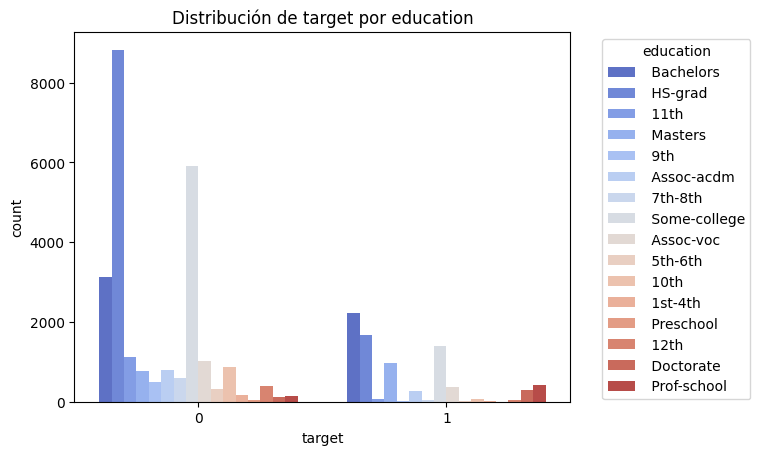

In [13]:
sns.countplot(x='target', hue=cols[1], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[1]}')
plt.legend(title=cols[1], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
# ordinal encoding
plt.show()

Este atributo resulta redundante porque tenemos el atributo 'education-num' que representa la misma informacion que el atributo 'education', por lo que se eliminara el atributo 'education' debido a que el atributo 'education-num' ya esta en un formato numerico.

#### Atributo Marital-status

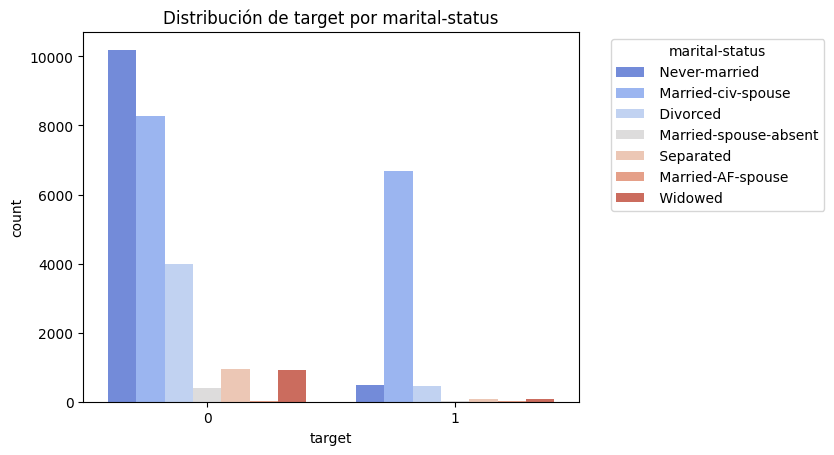

In [14]:
sns.countplot(x='target', hue=cols[2], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[2]}')
plt.legend(title=cols[2], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#one hot encodign
plt.show()

El atributo 'marital status' contiene el estado de la persona, contiene valores categoricos sobre el estado civil de la persona, observando los valores de este atributo, podemos agruparlos en dos categorias, 'married' y 'not-married', reduciendo la cantidad de los valores para dicho atributo. Una alternativa es utilizar la tecnica one-hot encoding para crear mas atributos que representen cada categoria, esto agregaria mas dimensionalidad al conjunto de datos pero puede ser una opcion interesante para observar si aporta algo de informacion util para el modelo de aprendizaje.

#### Atributo Occupation

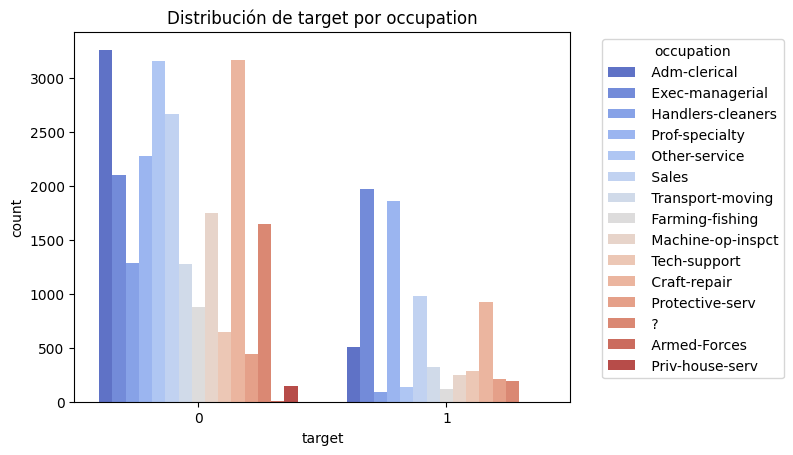

In [15]:
sns.countplot(x='target', hue=cols[3], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[3]}')
plt.legend(title=cols[3], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#one hot encoding
plt.show()

El atributo 'occupation' contiene valore categoricos, en este caso no se podra realizar un agrupamiento porque perderiamos informacion, en su caso se utilizar una tecnica para generar nuevas columnas con valores binarios.

#### Atributo Relationship

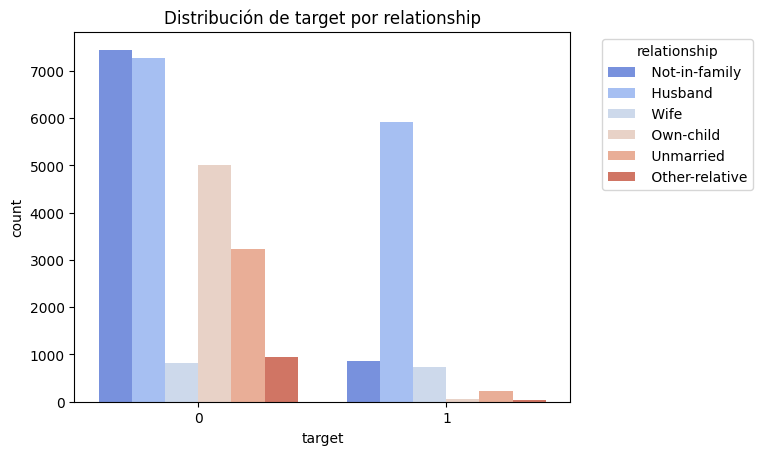

In [16]:
sns.countplot(x='target', hue=cols[4], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[4]}')
plt.legend(title=cols[4], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#one hot encoding
# se puede unir por marital status
plt.show()

Este atributo es parecido al atributo 'marital-status', sera evaluado si incluirlo en el conjunto de entrenamiento o eliminarlo.

#### Atributo Race

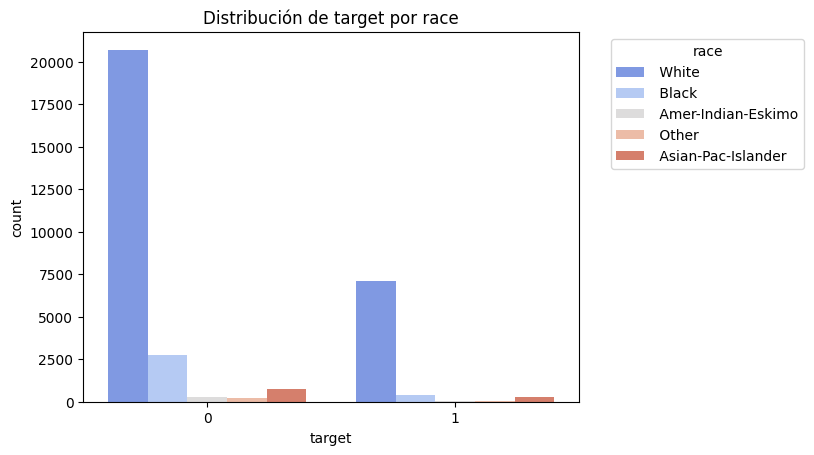

In [17]:
sns.countplot(x='target', hue=cols[5], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[5]}')
plt.legend(title=cols[5], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#One hot encoding
plt.show()

Este atributo especifica la raza de las personas, en este caso no hay mucha informacion que sacar debido a que para la priemera clase como para la segunda se tiene la mismas frecuencias de los valores, se evaluara la opcion si eliminar este atributo del conjunto de datos de entrenamiento.

#### Atributo Sex

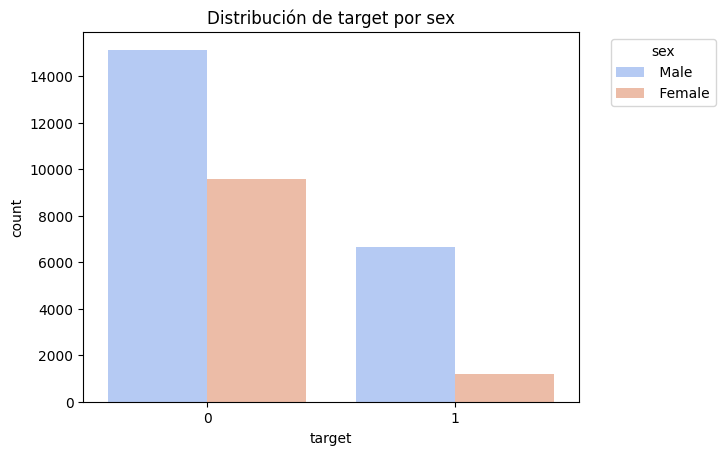

In [20]:
sns.countplot(x='target', hue=cols[6], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[6]}')
plt.legend(title=cols[6], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

El atributo 'sex' se puede representar en un valor binario 0 y 1, siendo 0 representando al valor 'Male' y le 1 al valor 'Female'.

#### Atributo Native-country

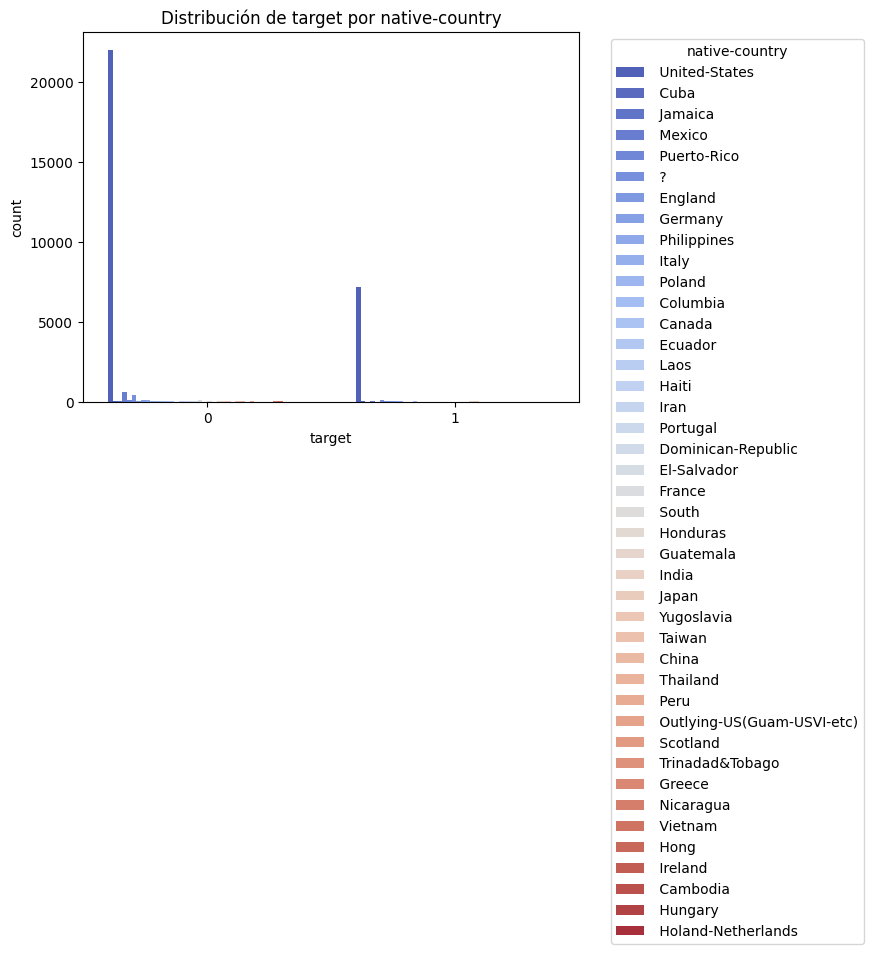

In [19]:
sns.countplot(x='target', hue=cols[7], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[7]}')
plt.legend(title=cols[7], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#Codificacion binaria
plt.show()

Este atributo contiene muchos valores, de los cuales todos a excepcion del valor 'United-States' tienen una frecuencia muy inferior en comparacion con 'United-States', por lo que una opcion es agrupar los demas paises como 'Not USA' para representarlos en un unico valor, ademas ayudaria a disminuir los valores del atributo 'naive-country'

## Preprocesamiento de los datos

### Limpieza

#### Eliminacion de columnas

In [89]:
# Eliminar las columnas seleccionadas y explicadas anteriormente
delete_cols = ['education', 'race', 'fnlwgt']

In [90]:
# Eliminar una sola columna
df_income = df_income.drop(delete_cols, axis=1)
df_income

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


#### Eliminacion de registros outliers de age

In [91]:
df_income = df_income.drop(df_income[df_income['age'] >= 70].index)

<Axes: xlabel='age'>

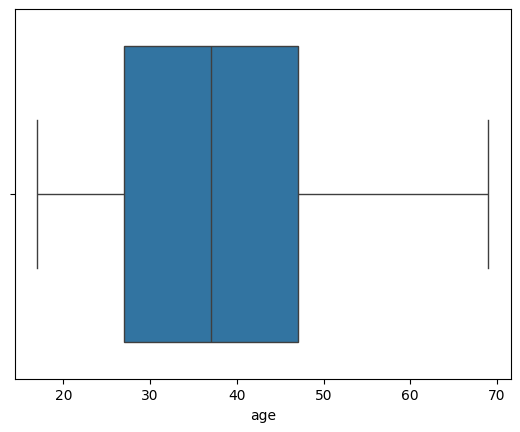

In [92]:
# Comprobacion de como quedo el atributo age despues de la limpieza
sns.boxplot(x='age', data=df_income)

### Transformacion

#### Rellenado de valores faltantes

In [93]:
#conteo = df_income[columna].replace(['?', ' ', ' ?'], np.nan).isnull().sum()
#Transformando los valores que representan nulo a verdaderos valores nulos
# Contando los valores nulos en el conjunto de datos
for columna in df_income.columns:
    df_income[columna] = df_income[columna].replace(['?', ' ', ' ?'], np.nan)
print(df_income.isnull().sum())


age                  0
workclass         1662
education-num        0
marital-status       0
occupation        1669
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     575
target               0
dtype: int64


In [94]:
# Para la limpieza de los datos vamos a rellenar los valores nulos que existen en los atributos con el valor mas frecuente de cada atributo
mode_work = df_income['workclass'].mode()
mode_occu = df_income['occupation'].mode()
mode_native = df_income['native-country'].mode()
#moda = df['fruta'].mode()
print('moda de workclass ->      ', mode_work[0])
print('moda de occupation ->     ', mode_occu[0])
print('moda de native-country -> ', mode_native[0])

moda de workclass ->        Private
moda de occupation ->       Prof-specialty
moda de native-country ->   United-States


In [95]:
# Rellenando los valores con la moda en los atributos con valores nulos
df_income['workclass'] = df_income['workclass'].fillna(mode_work[0])
df_income['occupation'] = df_income['occupation'].fillna(mode_occu[0])
df_income['native-country']= df_income['native-country'].fillna(mode_native[0])

In [96]:
# Comprobacion de que no existe valores nulos
print(df_income.isnull().sum())

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64


#### Reduccion de los datos

In [97]:
# Atributo capital-loss
# Se puede reducir a dos valores (=0 y >0 ) del rango [0, 1]
df_income['capital-loss'].value_counts()

# Atributo Age
df_income['capital-loss'] = np.where(df_income['capital-loss'] > 0, '>0', '0')
df_income['capital-loss'].unique()

# Atributo capital-gain
# Se puede reducir a dos valores (=0 y >0 ) del rango [0, 1]
df_income['capital-gain'].value_counts()

# Atributo Age
df_income['capital-gain'] = np.where(df_income['capital-gain'] > 0, '>0', '0')
df_income['capital-gain'].unique()

array(['>0', '0'], dtype=object)

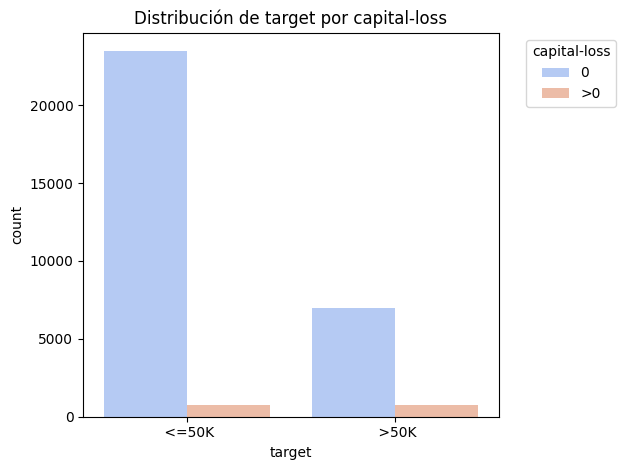

In [98]:
sns.countplot(x='target', hue=col_num_att[4], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {col_num_att[4]}')
plt.legend(title=col_num_att[4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Uncomment for better layout control
#plt.savefig("./Imagenes/adult-cap-loss.eps", transparent=True, bbox_inches='tight')
plt.show()  # Show the plot for visual inspection


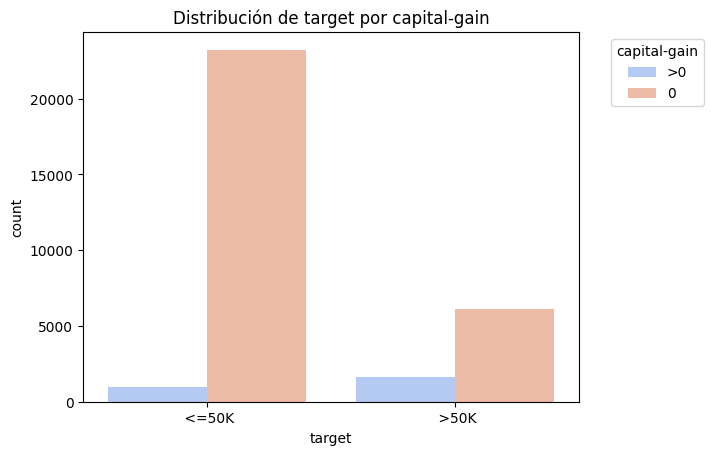

In [99]:
sns.countplot(x='target', hue=col_num_att[3], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {col_num_att[3]}')
plt.legend(title=col_num_att[3], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#plt.savefig("./Imagenes/adult-cap-gain.eps", transparent=True, bbox_inches = 'tight') 
plt.show()

In [100]:
# Atributo marital-status
df_income['marital-status'] = df_income['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df_income['marital-status'] = df_income['marital-status'].replace([' Never-married', ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed'], 'not-married')
# Atributo education
df_income['marital-status'].unique()

array(['not-married', 'married'], dtype=object)

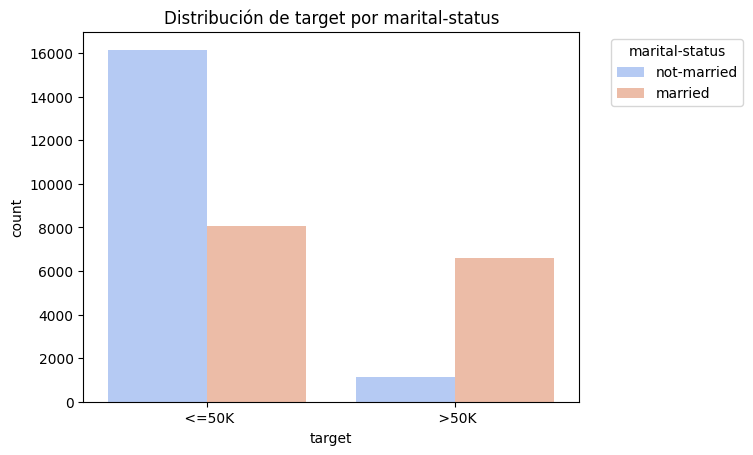

In [101]:
sns.countplot(x='target', hue=cols[2], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[2]}')
plt.legend(title=cols[2], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#plt.savefig("./Imagenes/adult-marital.eps", transparent=True, bbox_inches = 'tight') 
plt.show()


In [103]:
df_income['native-country'] = df_income['native-country'].replace([' United-States', ' Outlying-US(Guam-USVI-etc)'], 'US')
#df_income['native-country'] = df_income['native-country'].replace(df_income['native-country'].unique(), 'Not-US')


In [102]:
df_temp = df_income.copy()

In [77]:
df_income = df_temp

In [105]:
paises_restantes = [pais for pais in df_income['native-country'].unique() if pais not in 'US']
paises_restantes

[' Cuba',
 ' Jamaica',
 ' India',
 ' Mexico',
 ' South',
 ' Puerto-Rico',
 ' Honduras',
 ' England',
 ' Canada',
 ' Germany',
 ' Iran',
 ' Philippines',
 ' Italy',
 ' Poland',
 ' Cambodia',
 ' Thailand',
 ' Ecuador',
 ' Laos',
 ' Taiwan',
 ' Haiti',
 ' Portugal',
 ' Dominican-Republic',
 ' El-Salvador',
 ' France',
 ' Guatemala',
 ' China',
 ' Japan',
 ' Yugoslavia',
 ' Peru',
 ' Scotland',
 ' Trinadad&Tobago',
 ' Greece',
 ' Nicaragua',
 ' Vietnam',
 ' Hong',
 ' Columbia',
 ' Ireland',
 ' Hungary',
 ' Holand-Netherlands']

In [106]:
df_income['native-country'] = df_income['native-country'].replace(paises_restantes, 'Not-US')

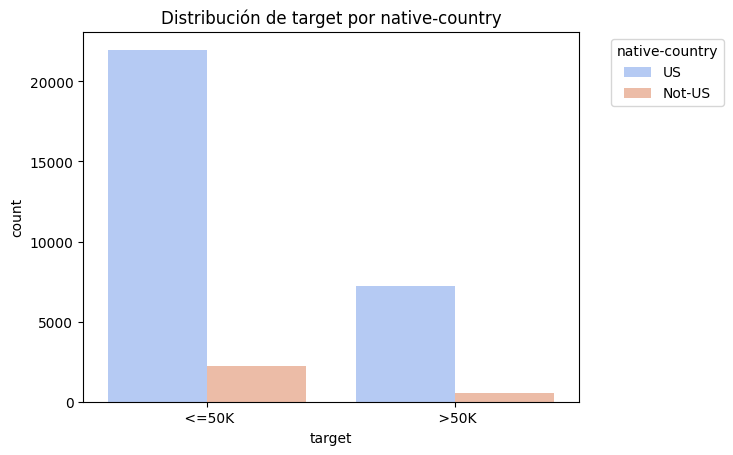

In [107]:
sns.countplot(x='target', hue=cols[7], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[7]}')
plt.legend(title=cols[7], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
#Codificacion binaria
plt.show()

In [122]:
# Transformando el atributo Native-country
df_income['native-country'] = label_encoder.fit_transform(df_income['native-country'])

In [123]:
# Transformando el atributo Marital Status
df_income['marital-status'] = label_encoder.fit_transform(df_income['marital-status'])

In [125]:
# Transformando el atributo Sex
df_income['sex'] = label_encoder.fit_transform(df_income['sex'])

In [127]:
# Transformando el atributo Capital loss & gain
df_income['capital-loss'] = label_encoder.fit_transform(df_income['capital-loss'])
df_income['capital-gain'] = label_encoder.fit_transform(df_income['capital-gain'])

In [128]:
df_income

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,1,Adm-clerical,Not-in-family,1,1,0,40,1,<=50K
1,50,Self-emp-not-inc,13,0,Exec-managerial,Husband,1,0,0,13,1,<=50K
2,38,Private,9,1,Handlers-cleaners,Not-in-family,1,0,0,40,1,<=50K
3,53,Private,7,0,Handlers-cleaners,Husband,1,0,0,40,1,<=50K
4,28,Private,13,0,Prof-specialty,Wife,0,0,0,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,0,Tech-support,Wife,0,0,0,38,1,<=50K
32557,40,Private,9,0,Machine-op-inspct,Husband,1,0,0,40,1,>50K
32558,58,Private,9,1,Adm-clerical,Unmarried,0,0,0,40,1,<=50K
32559,22,Private,9,1,Adm-clerical,Own-child,1,0,0,20,1,<=50K


#### Generacion de nuevos atributos

In [136]:
df_temp = df_income.copy()

In [130]:
df_income = pd.get_dummies(df_income, columns=['occupation', 'relationship', 'workclass'], prefix=['o_', 'r_', 'w_'], drop_first=True)

In [135]:
df_income

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,target,o__ Armed-Forces,...,r__ Own-child,r__ Unmarried,r__ Wife,w__ Local-gov,w__ Never-worked,w__ Private,w__ Self-emp-inc,w__ Self-emp-not-inc,w__ State-gov,w__ Without-pay
0,39,13,1,1,1,0,40,1,0,False,...,False,False,False,False,False,False,False,False,True,False
1,50,13,0,1,0,0,13,1,0,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,1,1,0,0,40,1,0,False,...,False,False,False,False,False,True,False,False,False,False
3,53,7,0,1,0,0,40,1,0,False,...,False,False,False,False,False,True,False,False,False,False
4,28,13,0,0,0,0,40,0,0,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,0,38,1,0,False,...,False,False,True,False,False,True,False,False,False,False
32557,40,9,0,1,0,0,40,1,1,False,...,False,False,False,False,False,True,False,False,False,False
32558,58,9,1,0,0,0,40,1,0,False,...,False,True,False,False,False,True,False,False,False,False
32559,22,9,1,1,0,0,20,1,0,False,...,True,False,False,False,False,True,False,False,False,False


El conjunto de datos aumento a 34 columnas, se utilizara la tecnica de normalizacion de los datos para que todas las columnas tengan la misma escala y ademas de hacer un PCA al conjunto de datos para reducir los atributos.

#### Normalizacion de los datos

In [137]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformar
df_income_scaled = scaler.fit_transform(df_income)

In [139]:
df_income_scaled = pd.DataFrame(df_income_scaled, columns=df_income.columns)

In [140]:
df_income_scaled

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,target,o__ Armed-Forces,...,r__ Own-child,r__ Unmarried,r__ Wife,w__ Local-gov,w__ Never-worked,w__ Private,w__ Self-emp-inc,w__ Self-emp-not-inc,w__ State-gov,w__ Without-pay
0,0.090142,1.138375,0.921695,0.703025,3.347599,-0.220847,-0.057836,0.306918,-0.565054,-0.016791,...,-0.433987,-0.344918,-0.226176,-0.26274,-0.014808,-1.756103,-0.186200,-0.287125,4.879671,-0.020181
1,0.955164,1.138375,-1.084957,0.703025,-0.298722,-0.220847,-2.288381,0.306918,-0.565054,-0.016791,...,-0.433987,-0.344918,-0.226176,-0.26274,-0.014808,-1.756103,-0.186200,3.482806,-0.204932,-0.020181
2,0.011503,-0.428799,0.921695,0.703025,-0.298722,-0.220847,-0.057836,0.306918,-0.565054,-0.016791,...,-0.433987,-0.344918,-0.226176,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
3,1.191080,-1.212386,-1.084957,0.703025,-0.298722,-0.220847,-0.057836,0.306918,-0.565054,-0.016791,...,-0.433987,-0.344918,-0.226176,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
4,-0.774881,1.138375,-1.084957,-1.422424,-0.298722,-0.220847,-0.057836,-3.258199,-0.565054,-0.016791,...,-0.433987,-0.344918,4.421342,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31927,-0.853520,0.746582,-1.084957,-1.422424,-0.298722,-0.220847,-0.223061,0.306918,-0.565054,-0.016791,...,-0.433987,-0.344918,4.421342,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
31928,0.168780,-0.428799,-1.084957,0.703025,-0.298722,-0.220847,-0.057836,0.306918,1.769742,-0.016791,...,-0.433987,-0.344918,-0.226176,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
31929,1.584272,-0.428799,0.921695,-1.422424,-0.298722,-0.220847,-0.057836,0.306918,-0.565054,-0.016791,...,-0.433987,2.899241,-0.226176,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181
31930,-1.246712,-0.428799,0.921695,0.703025,-0.298722,-0.220847,-1.710091,0.306918,-0.565054,-0.016791,...,2.304219,-0.344918,-0.226176,-0.26274,-0.014808,0.569443,-0.186200,-0.287125,-0.204932,-0.020181


#### Reduccion de dimensionalidad con PCA

In [142]:
df_temp = df_income.copy()

In [144]:
# Crear un objeto PCA y especificar el número de componentes
pca = PCA(n_components=0.85)  # Queremos reducir a una sola dimensión

# Ajustar el PCA a los datos y transformar
df_income_pca = pca.fit_transform(df_income_scaled)

# Crear un DataFrame con los componentes principales
df_income_pca = pd.DataFrame(data = df_income_pca, columns = ['PC' + str(i+1) for i in range(df_income_pca.shape[1])])


In [145]:
df_income_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.965194,-2.461538,-0.999170,1.638883,-0.012445,-0.550691,0.048277,1.037606,-1.532629,0.438425,...,-1.094361,0.612374,0.029113,-0.952970,0.883758,0.109869,-0.946612,-0.810787,1.017939,-0.193981
1,-2.010235,-0.583064,-1.564256,-0.462168,0.062850,1.835712,0.366935,0.268646,-1.625010,0.096149,...,0.203148,0.040519,-0.145090,0.215426,0.912894,0.701273,-0.731371,0.904574,1.588300,-1.629475
2,1.404573,0.830863,-0.260997,1.769054,-0.229199,-0.968585,-0.161798,1.310707,0.142251,0.676678,...,1.579726,1.150572,0.264154,-1.120993,3.062854,-1.529557,0.544768,-0.984611,0.562766,0.133422
3,0.088887,2.129559,-0.169476,-0.265115,0.438840,-0.916818,-0.444979,0.798028,0.155412,1.107905,...,1.475205,1.144960,0.281259,-1.181394,3.190902,-1.560147,0.542083,-1.163786,0.703665,0.444385
4,-0.091995,-1.191615,2.388757,-3.036106,0.627776,-0.085924,2.392148,1.670022,0.651484,-0.605123,...,-0.241812,0.299267,-0.305142,-0.213043,0.351165,-0.036503,0.749245,0.420417,-3.132510,-1.375841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31927,0.121514,-0.788258,2.362585,-2.307769,0.535232,0.358884,1.166238,-0.500608,-1.155323,-1.477309,...,3.577993,0.126555,0.191371,1.750803,0.037625,-0.980780,2.282761,1.450054,-1.277337,0.180638
31928,-0.881629,1.843032,1.044007,-0.697057,-0.202884,-0.911007,-0.188942,0.008385,0.688306,0.827398,...,-1.326924,-0.642528,-0.007130,0.231234,-0.086932,0.352400,0.273563,0.137608,1.303916,0.063675
31929,1.131248,-0.787321,0.211130,-1.354795,-2.065229,0.071411,-0.764691,-1.646545,0.131780,1.334480,...,0.324323,0.088349,0.212222,-0.111587,0.414779,-0.197526,-0.235174,-0.165819,-0.128662,0.398081
31930,2.238385,0.573219,-0.049798,0.374514,2.154106,0.491172,-0.130993,-0.275976,-0.428450,0.254824,...,-0.125245,0.115320,-0.061547,0.141334,-0.341969,0.585251,0.196950,0.110906,0.351029,-0.138000


### Integracion

#### Generando el nuevo conjunto de datos de entrenamiento y prueba